<a href="https://colab.research.google.com/github/hnk1203/study/blob/wonjun/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tensorflow setting



In [ ]:
#python 버전 확인
!python --version

Python 3.10.12


In [ ]:
#tensorflow  버전 확인
import tensorflow as tf

print(tf.__version__)

2.15.0


In [ ]:
#tensorflow 2.0 장점
# keras와 즉시 실행을 이용해서 쉬운 모델 작성 가능

#colab 의 단점은 연결 시간이 한정되어있다...12시간
#Colab Pro 로 해결=> GPU 성능이 더좋고 24시간동안 연결 가능 램도 25.5GB 제공



# 소프트맥스 함수 구현


In [ ]:
import numpy as np

In [ ]:
def softmax(x):
  exp_x = np.exp(x)
  sum_exp_x = np.sum(exp_x)
  y = exp_x / sum_exp_x

  return y

In [ ]:
x = np.array([1.5, 3.6, 4.5])
y = softmax(x)
print(y)

[0.03418604 0.27916901 0.68664495]


# 신경망 실습

In [ ]:
import tensorflow as tf

In [ ]:
from keras.datasets import fashion_mnist # 기본적으로 제공하는 데이터셋

In [ ]:
#거의 헬로 월드 급 의 데이터이다
# 상의 하의 신발 이렇게 되어있다

(x_train_data, t_train_data), (x_test_data, t_test_data) = fashion_mnist.load_data()

In [ ]:
x_train = x_train_data
x_test = x_test_data
t_train = t_test_data
t_test = t_test_data

In [ ]:
print("x_train shape : ", x_train.shape, "t_train shape : ", t_train.shape)

x_train shape :  (60000, 28, 28) t_train shape :  (10000,)


In [ ]:
x_train_reduced = x_train[:10000]

In [ ]:
# 28 * 28 픽셀을 의미한다 , 데이터 갯수가 6만개 있다

import matplotlib.pyplot as plt


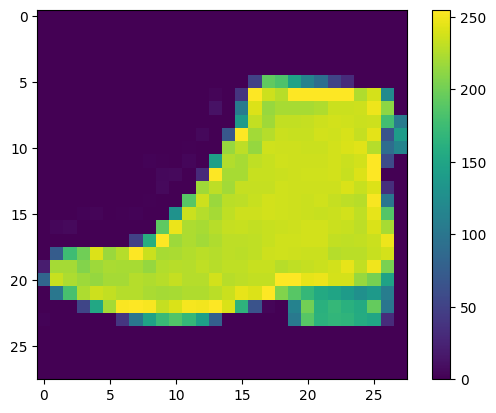

In [ ]:
plt.imshow(x_train[7000])
plt.colorbar() # 픽셀값의 범위가 컬러로 나타남

In [ ]:
#전처리 => 신경망 모델에 넣기 위해 0 ~ 1 사이의 값들로 변환해야함

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
#그래서 이렇게 나눠준다

In [ ]:
#모델을 구성하자

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(256, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
]) # seq모델은 딥러닝 모델을 구성하기 위해서 쓰이는 모델

In [ ]:
#모델을 컴파일링 시키자 # sgd : 확률적 경사
model.compile(optimizer = 'sgd',
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
#sgd : gradient를 구하는데 1개 데이터만 사용한다. 근데 이데이터를 무작위로 선택한다
#그래서 확률적 경사논법? 이라고 한다  노이즈가 심하다 단점

In [ ]:
#모델 훈련
model.fit(x_train_reduced, t_train, epochs = 50)

Epoch 1/50
313/313 [==============================] - 1s 3ms/step - loss: 2.2801 - accuracy: 0.1348
Epoch 2/50
313/313 [==============================] - 1s 3ms/step - loss: 2.2801 - accuracy: 0.1410
Epoch 3/50
313/313 [==============================] - 1s 3ms/step - loss: 2.2792 - accuracy: 0.1385
Epoch 4/50
313/313 [==============================] - 1s 3ms/step - loss: 2.2791 - accuracy: 0.1422
Epoch 5/50
313/313 [==============================] - 1s 3ms/step - loss: 2.2785 - accuracy: 0.1413
Epoch 6/50
313/313 [==============================] - 1s 3ms/step - loss: 2.2778 - accuracy: 0.1393
Epoch 7/50
313/313 [==============================] - 1s 3ms/step - loss: 2.2772 - accuracy: 0.1462
Epoch 8/50
313/313 [==============================] - 1s 4ms/step - loss: 2.2765 - accuracy: 0.1446
Epoch 9/50
313/313 [==============================] - 3s 8ms/step - loss: 2.2766 - accuracy: 0.1399
Epoch 10/50
313/313 [==============================] - 1s 3ms/step - loss: 2.2761 - accuracy: 0.1469

In [ ]:
#정확도 평가

test_loss, test_accuracy = model.evaluate(x_test, t_test)
print("정확도 : ", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 2.3162 - accuracy: 0.1047
정확도 :  0.1046999990940094


# CNN 개념 및 실습

In [ ]:
import tensorflow as tf

In [ ]:
from keras.datasets import mnist # 이게 진짜 헬로월드 손글씨 숫자 가지고 있음 0 ~ 9

In [ ]:
(x_train_data, y_train_data), (x_test_data, y_test_data) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train_data
x_test = x_test_data
y_train = y_test_data
y_test = y_test_data

In [ ]:
print("x_train shape : ", x_train.shape, "y_train shape : ", y_train.shape)

x_train shape :  (60000, 28, 28) y_train shape :  (10000,)


In [ ]:
x_train_reduced = x_train[:10000]

In [ ]:
import matplotlib.pyplot as plt


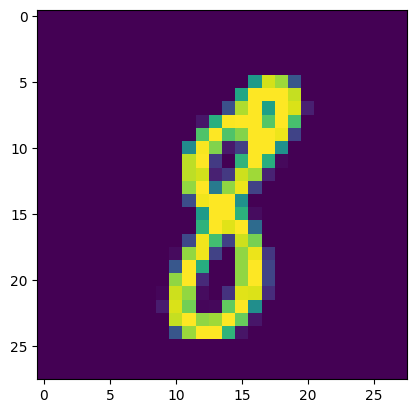

In [ ]:
plt.imshow(x_train[300])

In [ ]:
#전처리
x_train = x_train_reduced.reshape((10000, 28,28,1))
x_test = x_test.reshape((10000, 28,28,1))

x_train = x_train_reduced.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
#create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, strides = (1,1), kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters = 64, strides = (1,1), kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters = 64, strides = (1,1), kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax),
])

In [ ]:
  #모델 컴파일
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
#adam 이라는 것은 momentum 과 adagrad 를 섞은 기법이다.
#momentum 은 sgd 를 보완해주는거, 그리고 이 기울기 업데이트시 폭을 조절하는 역할
#adagrad 같은 경우, 학습률과 학습 시간 사이의 관계 속에서의 절충안

#뭐 할지 모르겠다 싶으면 adam 쓰면 된다



In [ ]:
#모델 훈련
model.fit(x_train_reduced, y_train, epochs=3)

Epoch 1/3


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "conv2d_6" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28, 28), dtype=float32)
      • training=True
      • mask=None


In [ ]:
#정확도 평가

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('정확도 : ', test_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 2.5064 - accuracy: 0.1032
정확도 :  0.10320000350475311


# RNN 개념 및 실습

In [ ]:
import tensorflow as tf

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train_data, y_train_data), (x_test_data, y_test_data) = mnist.load_data()

In [ ]:
x_train = x_train_data
x_test = x_test_data
y_train = y_train_data
y_test = y_test_data

In [ ]:
print("x_train shape : ", x_train.shape, "y_train shape : ", y_train.shape)

x_train shape :  (60000, 28, 28) y_train shape :  (60000,)


In [ ]:
import matplotlib.pyplot as plt

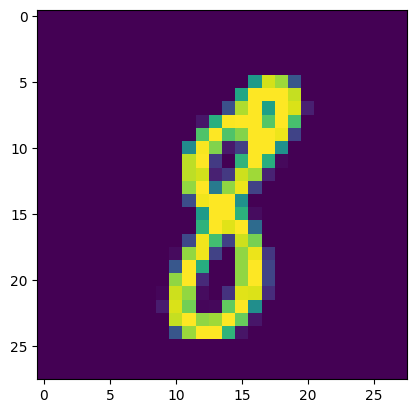

In [ ]:
plt.imshow(x_train[300])

In [ ]:
#전처리  ==> 이미지 데이터니까 이미지 데이터를 RNN에 넣을수 없으니까 전처리 해야됨

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
#모델 만들기

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dense(64,activation=tf.nn.tanh),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax),
])

In [ ]:
#모델 컴파일

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
 117/1875 [>.............................] - ETA: 23s - loss: 0.1421 - accuracy: 0.9583

KeyboardInterrupt: 

In [ ]:
#정홗도 평가

test_loss, test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 10ms/step - loss: 0.1686 - accuracy: 0.9508
